## Project Plan

1. Prepare data and do EDA(Exploratory Data Analysis)
2. Use linear regression for predicting price
3. Understand the internals of linear regression
4. Evaluating the model with RMSE
5. FEature engineering
6. Regularization
7. Use model

In [1]:
import numpy as np
import pandas as pd

## Data preparation

In [2]:
pd.read_csv('data.csv')

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [6]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [7]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [8]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [9]:
df.dtypes[df.dtypes == 'object'].index

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [10]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [11]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ','_')

In [12]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

### Exploratoty Data Analysis

In [13]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='msrp', ylabel='Count'>

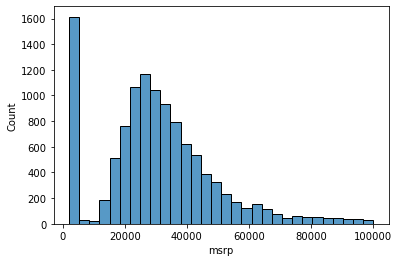

In [15]:
sns.histplot(df.msrp[df.msrp < 100000], bins = 30)

# long tain distribution

In [16]:
np.log([0,1,10,1000,100000])

<ipython-input-16-aec4af5fb10c>:1: RuntimeWarning: divide by zero encountered in log
  np.log([0,1,10,1000,100000])


array([       -inf,  0.        ,  2.30258509,  6.90775528, 11.51292546])

In [17]:
# apply logarithmic distribution to get more compact values
# log1p adds 1 to all the values and takes the log
np.log1p([0, 1, 10, 1000, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [18]:
price_logs = np.log1p(df.msrp)

In [19]:
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<AxesSubplot:xlabel='msrp', ylabel='Count'>

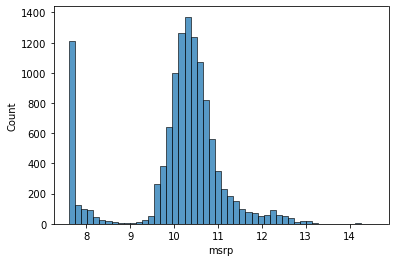

In [20]:
sns.histplot(price_logs, bins = 50)

### Missing values

In [21]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## Setting validation framework

In [22]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [23]:
n, n_val, n_test, n_train

(11914, 2382, 2382, 7150)

In [24]:
df_train = df.iloc[n_train:]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]


In [25]:
# shuffle data
idx = np.arange(n)

In [26]:
# set random seed to make it reproducable
np.random.seed(2)
np.random.shuffle(idx)

In [27]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [28]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [29]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [30]:
# reset index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [31]:
df_test

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,gmc,vandura,1994,regular_unleaded,165.0,6.0,automatic,rear_wheel_drive,3.0,NaN,compact,cargo_van,20,15,549,2000
1,mercedes-benz,600-class,1993,regular_unleaded,389.0,12.0,automatic,rear_wheel_drive,2.0,luxury,large,coupe,15,11,617,3211
2,toyota,venza,2013,regular_unleaded,268.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",midsize,wagon,25,18,2031,31120
3,volvo,740,1992,regular_unleaded,114.0,4.0,automatic,rear_wheel_drive,4.0,luxury,midsize,sedan,26,18,870,2000
4,ford,crown_victoria,2010,flex-fuel_(unleaded/e85),224.0,8.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,sedan,24,16,5657,29905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,chevrolet,chevy_van,1998,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,NaN,midsize,cargo_van,18,13,1385,2052
2378,subaru,xv_crosstrek,2014,regular_unleaded,160.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",compact,4dr_suv,33,29,640,25995
2379,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,NaN,large,wagon,22,15,1851,29100
2380,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,42,31,2202,22200


In [32]:
# transformation target
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [33]:
# remove target from labels df
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [34]:
len(y_train)

7150

## Linear Regression

In [35]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [36]:
[453, 11, 86]

[453, 11, 86]

$$\sum_{j=0}^{+\infty} A_{j}$$


$$\sum_{j=0}^{+\infty} A_{j}$$


$$g(x_i) = W_0 + W_1x_{i1} + W_2x_{i2} + W_3x_{i3}$$
W_0 -> biased term
<br>
W -> weights
<br>
x -> features
<br>
<br>
### Linear Regression
$$ g(x_i) = W_0 + \sum_{j=1}^nW_j.x_{ij}$$

### Python implementation
$$g(x_i) = W_0 + \sum_{j=0}^{n-1}.W_jx_{ij}$$

In [37]:
xi = [453, 11, 86]

In [38]:
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [39]:
def linear_regression(xi):
    n = len(xi)
    
    pred = w0
    
    for j in range(n):
        pred+= w[j] * xi[j]
    
    return pred

In [40]:
linear_regression(xi)

12.312

In [41]:
# Undo log(y+1)
# get exponent:=> np.exp()
# we do "-1" to undo the "+1" we did inside log
# np.expm1()
np.expm1(linear_regression(xi))

222347.2221101062

In [42]:
np.log1p(222347.2221101062)

12.312

## Linear Regression Vector form

$$g(x_i) = W_0 + x_i^T.W$$

W<sub>o</sub> -> biased term
<br>
W -> weights
<br>
x -> features

In [43]:
def dot(xi, w):
    n = len(xi)
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]
        
    return res

In [44]:
def linear_regression(xi):
    return w0 + dot(xi, w)

### <div style="text-align: center"> Shorter notation </div>

$$W_0 + x_i^T.W$$

$$W_0.x_{i0} + x_i^T.W$$

$$ W = [W_0 W_1 W_2 ... W_n]$$
<br>

<div style="text-align: center"> n x 1 dimension </div> 
<br>
$$ X = [X_{i0}   X_{i1} X_{i2} ... X_{in}]$$

$$ or $$

$$ X_i = [1  X_{i1}  X_{i2} ... X_{in}]$$

In [45]:
w_new = [w0] + w

In [46]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [47]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [48]:
linear_regression(xi)

12.312

### <div style="text-align: center"> X </div>   
<div style="text-align: center"> m x (n+1) </div> <br>
$$
\begin{Vmatrix}
1 & X_{11} & ... & X_{in}\\
1 & X_{21} & ... & X_{2n}\\
1 & ... & ... & ... \\
1 & X_{m1} & ... & X_{mn}
\end{Vmatrix}
\times
\begin{Vmatrix}
W_0\\
W_1\\
...\\
W_n\\
\end{Vmatrix}
=
\begin{Vmatrix}
X_1^T.W\\
X_2^T.W\\
...\\
X_m^T.W
\end{Vmatrix}
$$

### <div style="text-align: center"> Our predictions yp </div>  
$$
\begin{Vmatrix}
X_1^T.W\\
X_2^T.W\\
...\\
X_m^T.W
\end{Vmatrix}
$$


In [49]:
# implementation 
xi = [433, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [50]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 24, 1385]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   24, 1385],
       [   1,  453,   11,   86]])

In [51]:
def linear_regression(X):
    return X.dot(w_new)

In [52]:
linear_regression(X)

array([12.38 , 12.22 , 12.312])

## Training Linear Regression: Normal Equation

$ Xw ≈ y $

If Inverse existed for X, then
<br>
<br>

<div>
$ X^{-1}Xw = X^{-1}y$<br>
$ Iw = X^{-1}y$<br>
$ w = X^{-1}y$
    </div>
    <br>
However, X's Inverse does not exist.<br>It has a dimensionality of `m x n+1`.
<br>
The solution does not exist<br>

### An approximate solution
$X^T$ -> the X transpose
<br><br>
$X^{T}Xw = X^{T}y$
<br><br>
$X^TXw$ -> GRAM MATRIX<br><br>
Dim is (n+1)x(n+1)
<br><br>
The inverse exists.<br>
**NB**: the inverse doesn't always exist
<br>
<br>
${(X^{T}X)}^{-1}X^{T}Xw = {(X^{T}X)}^{-1}X^{T}y$
<br><br>
$Iw = {(X^{T}X)}^{-1}X^{T}y$<br><br>
$Iw = w$<br><br>
$w = {(X^{T}X)}^{-1}X^{T}y$<br>



<br>
<br>
For further reading: Elements of Statistical Learning

In [53]:
# Implementation

#def train_linear_regression(X, y):
#    pass
    

In [109]:
# X before ones
X = [
    [133,24,2345],
    [143,34,1145],
    [453,44,45],
    [83,38,445],
    [223,30,7345],
    [343,22,1345],
    [178,11,245],
    [333,31,945],
    [127,25,345]
]
X = np.array(X)
X

array([[ 133,   24, 2345],
       [ 143,   34, 1145],
       [ 453,   44,   45],
       [  83,   38,  445],
       [ 223,   30, 7345],
       [ 343,   22, 1345],
       [ 178,   11,  245],
       [ 333,   31,  945],
       [ 127,   25,  345]])

In [55]:
# Include biased term in training
# The biased term gives the baseline(How mush a car should cost if we don't know anything about it)
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [56]:
# Takes two vectors and stacks them together
X = np.column_stack([ones, X])

In [57]:
y = [10000, 20000, 14000, 23000, 24000, 12000, 25000, 16000, 17000]

${(X^{T}X)}^{-1}X^{T}Xw = {(X^{T}X)}^{-1}X^{T}y$
<br>
<br>

$w = {(X^{T}X)}^{-1}X^{T}y$


In [58]:
XTX = X.T.dot(X)
XTX.shape

(4, 4)

In [59]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv.shape

(4, 4)

In [60]:
w_full = XTX_inv.dot(X.T).dot(y)

In [61]:
w0 = w_full[0]
w = w_full[1:]

In [62]:
w0, w

(20727.058977784174, array([-17.44613883,  10.55570855,   0.48531901]))

In [110]:
# Implementation
# Run *X before ones*

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [111]:
X.shape

(9, 3)

In [112]:
train_linear_regression(X, y)

(20727.058977784174, array([-17.44613883,  10.55570855,   0.48531901]))

## Car price baseline model

In [70]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [71]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']



In [72]:
# Subset of columns
X_train = df_train[base].values

In [73]:
# Check for missing values
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

### Missing values

$g(x_i) = W_0 + X_{i1}W_1 + X_{i2}.W_2$
<br><br>
$X_{i1}$ is missing<br>
Replace is with zero<br><br>
$g(x_i) = W_0 + 0.W_1 + X_{i2}.W_2$<br>
$g(x_i) = W_0 + X_{i2}.W_2$

In [74]:
# Fill missing values with zero
df_train[base].fillna(0).isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [75]:
X_train = df_train[base].fillna(0).values

In [76]:
w0, w = train_linear_regression(X_train, y_train)

In [77]:
y_pred = w0 + X_train.dot(w)

<AxesSubplot:ylabel='Count'>

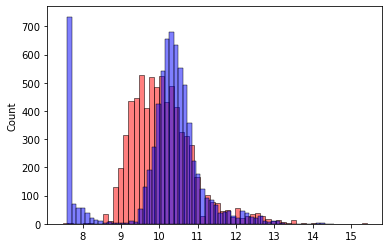

In [78]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=60)
sns.histplot(y_train, color='blue', alpha=0.5, bins=60)

### Histogram
red - prediction<br>
blue - target

<br>

The model is not doing well

## RootMeanSquareError

The root-mean-square deviation or root-mean-square error is a frequently used measure of the differences between values predicted by a model or an estimator and the values observed.<br><br>
$g(x_i)$ - Prediction for $x_i$ \
\
$y_i$ - Actual value \
\
RMSE = $\sqrt{\frac{1}{m}\sum^{m}_{i=1}(g(x_i)-y_i)^2}$

In [79]:
# implementation

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [80]:
rmse(y_train, y_pred)

0.7554192603920132

## Validating the model

**TRAIN**<br>
Train linear regression model $g(x_i)$ \
<br>

**VAL(Validation)**<br>
Apply $g(x_i)$ to VAL data and check `RMSE` on VAL dataset \
<br>
**TEST**<br>

In [81]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [82]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [83]:
# Train
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# Val
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.7616530991301601

## Simple feature engineering


In [84]:
2017 - df_train.year

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [85]:
def prepare_X(df):
    
    # Avoid data modification
    df = df.copy()
    df['age'] = 2017 - df.year
    features = base + ['age']
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [86]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5172055461058335

<AxesSubplot:ylabel='Count'>

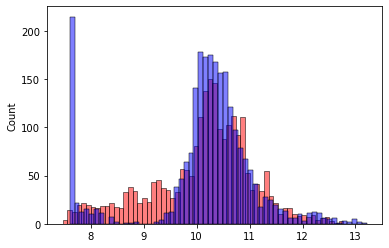

In [87]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=60)
sns.histplot(y_val, color='blue', alpha=0.5, bins=60)


In [88]:
X_train

array([[1.480e+02, 4.000e+00, 3.300e+01, 2.400e+01, 1.385e+03, 9.000e+00],
       [1.320e+02, 4.000e+00, 3.200e+01, 2.500e+01, 2.031e+03, 5.000e+00],
       [1.480e+02, 4.000e+00, 3.700e+01, 2.800e+01, 6.400e+02, 1.000e+00],
       ...,
       [2.850e+02, 6.000e+00, 2.200e+01, 1.700e+01, 5.490e+02, 2.000e+00],
       [5.630e+02, 1.200e+01, 2.100e+01, 1.300e+01, 8.600e+01, 3.000e+00],
       [2.000e+02, 4.000e+00, 3.100e+01, 2.200e+01, 8.730e+02, 0.000e+00]])

## Categorical variables

In [ ]:
# df_train['num_doors_2']=(df_train.number_of_doors == 2).astype('int')
# df_train['num_doors_3']=(df_train.number_of_doors == 3).astype('int')
# df_train['num_doors_4']=(df_train.number_of_doors == 4).astype('int')

In [ ]:
# for v in [2,3,4]:
#     df_train['num_doors_%s' % v]=(df_train.number_of_doors == v).astype('int')

In [ ]:
# del df_train['num_doors_4']

In [117]:
def prepare_X(df):
    
    # Avoid data modification
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2,3,4]:
        df['num_doors_%s' % v]=(df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [118]:
prepare_X(df_train)

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   1.],
       [563.,  12.,  21., ...,   0.,   0.,   1.],
       [200.,   4.,  31., ...,   0.,   0.,   1.]])

In [119]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5157995641502353

In [120]:
df.make.nunique()

48

In [121]:
df.make.value_counts().head()

chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: make, dtype: int64

In [122]:
makes = list(df.make.value_counts().head().index)
makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [137]:
def prepare_X(df):
    
    # Avoid data modification
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2,3,4]:
        df['num_doors_%s' % v]=(df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
    
    for v in makes:
        df['make_%s' % v]=(df.make == v).astype('int')
        features.append('make_%s' % v)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [138]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5076038849557035

In [125]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [130]:
categorical_vars = ['make','engine_fuel_type','transmission_type','driven_wheels','market_category','vehicle_size','vehicle_style'
]

In [139]:
categories = {}


for c in categorical_vars:
    categories[c] = list(df[c].value_counts().head().index)

In [140]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [141]:
def prepare_X(df):
    
    # Avoid data modification
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2,3,4]:
        df['num_doors_%s' % v]=(df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
        
    for c, values in categories.items():
        for v in values:
            df['%s_%s' % (c,v)]=(df[c] == v).astype('int')
            features.append('%s_%s' % (c,v))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [142]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

23.370682839235876

## Regularization

Regularization refers to techniques that are used to calibrate machine learning models in order to minimize the adjusted loss function and prevent overfitting or underfitting.

In [151]:
X = [
    [4,4,4],
    [3,5,5],
    [5,1,1],
    [5,4,4],
    [7,5,5],
    [4,5,5.00000001]
]

X = np.array(X)
X

array([[4.        , 4.        , 4.        ],
       [3.        , 5.        , 5.        ],
       [5.        , 1.        , 1.        ],
       [5.        , 4.        , 4.        ],
       [7.        , 5.        , 5.        ],
       [4.        , 5.        , 5.00000001]])

In [154]:
y = [1,2,3,1,2,3]

In [152]:
XTX = X.T.dot(X)
XTX

array([[140.        , 111.        , 111.00000004],
       [111.        , 108.        , 108.00000005],
       [111.00000004, 108.00000005, 108.0000001 ]])

In [155]:
# The inverse of XTX doesn't always exist
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 3.86409478e-02, -1.26839821e+05,  1.26839770e+05],
       [-1.26839767e+05,  2.88638033e+14, -2.88638033e+14],
       [ 1.26839727e+05, -2.88638033e+14,  2.88638033e+14]])

In [157]:
w = XTX_inv.dot(X.T).dot(y)
w

array([-1.93908875e-01, -3.61854375e+06,  3.61854643e+06])

In [164]:
XTX = [
    [1,2,2],
    [2,1,1.00001],
    [2,1.00001,1]
]
XTX = np.array(XTX)

In [165]:
np.linalg.inv(XTX)

array([[-3.33335556e-01,  3.33333889e-01,  3.33333889e-01],
       [ 3.33333889e-01, -5.00000833e+04,  4.99999167e+04],
       [ 3.33333889e-01,  4.99999167e+04, -5.00000833e+04]])

In [166]:
XTX = XTX + 0.01 * np.eye(3)

In [167]:
def train_linear_regression_reg(X, y, r=0.01):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [168]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.45652199013026107

## Tunning the model

In [171]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1 , 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0.0 8076722330785280.0 23.370682839235876
1e-05 8.796876877765598 0.4565170168175915
0.0001 6.33106628120822 0.4565170633148812
0.001 6.285517742466579 0.4565175086998797
0.1 6.191208658848039 0.4565692763039577
1 5.634896667867927 0.45722043179962046
10 4.283980108970553 0.470145693209949


In [173]:
r = 0.01
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

0.45652199013026107

##  Using the model

In [175]:
df_full_train = pd.concat([df_train, df_val])

In [178]:
df_full_train = df_full_train.reset_index(drop=True)

In [179]:
X_full_train = prepare_X(df_full_train)

In [180]:
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

In [181]:
y_full_train = np.concatenate([y_train, y_val])

In [182]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r = 0.001)

In [183]:
w

array([ 1.52506334e-03,  1.18188696e-01, -6.66105696e-03, -5.33414091e-03,
       -4.87603196e-05, -9.69091847e-02, -7.92622975e-01, -8.90864188e-01,
       -6.35102899e-01, -4.14339218e-02,  1.75560737e-01, -5.78066900e-04,
       -1.00563873e-01, -9.27549679e-02, -4.66859091e-01,  7.98659936e-02,
       -3.16047640e-01, -5.51981605e-01, -7.89525315e-02,  1.09531272e+00,
        9.20005178e-01,  1.14958257e+00,  2.65271864e+00,  5.09941747e-01,
        1.62936824e+00,  1.53007229e+00,  1.61725101e+00,  1.54525040e+00,
       -9.70559779e-02,  3.73062080e-02, -5.81767462e-02, -2.35940812e-02,
       -1.19357037e-02,  2.18895262e+00,  2.07458272e+00,  2.05916687e+00,
       -5.00802769e-02,  5.62184639e-02,  1.84794024e-01,  3.32646151e-01,
       -1.58817038e-01])

In [184]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.4517749304665327

In [186]:
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [189]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [190]:
X_small = prepare_X(df_small)

In [192]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

10.462651724811238

In [193]:
np.expm1(y_pred)

34983.19702059413

In [195]:
np.expm1(y_test[20])

35000.00000000001